In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import r2_score 

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

# from sklearn.pipeline import Pipeline,make_pipeline
# from sklearn.feature_selection import SelectKBest,chi2

from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LinearRegression

from datetime import datetime

In [39]:
df = pd.read_csv('SBI_data.csv')

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0
1,2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0
2,2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0
3,2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0
4,2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0
...,...,...,...,...,...,...,...
5881,2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0
5882,2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0
5883,2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0
5884,2024-08-05,830.000000,831.349976,800.000000,811.650024,811.650024,27676951.0


In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5886 non-null   datetime64[ns]
 1   Open       5877 non-null   float64       
 2   High       5877 non-null   float64       
 3   Low        5877 non-null   float64       
 4   Close      5877 non-null   float64       
 5   Adj Close  5877 non-null   float64       
 6   Volume     5877 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 322.0 KB


In [43]:
df['Year'] = df['Date'].dt.year

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001
1,2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001
2,2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001
3,2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001
4,2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001
...,...,...,...,...,...,...,...,...
5881,2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024
5882,2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024
5883,2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024
5884,2024-08-05,830.000000,831.349976,800.000000,811.650024,811.650024,27676951.0,2024


In [45]:
df.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
Year         0
dtype: int64

In [46]:
df = df.set_index(df['Date'], drop=False, append=False, inplace=False, verify_integrity=False)

In [47]:
df = df.drop('Date', axis=1)

In [48]:
df

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001
...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024


In [49]:
df.shape


(5886, 7)

In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year
count,5877.000000,5877.000000,5877.000000,5877.000000,5877.000000,5.877000e+03,5886.000000
mean,228.313987,231.295645,224.970820,228.031019,208.880731,2.349112e+07,2012.201835
std,169.721537,171.334970,167.846130,169.587342,168.302555,1.852027e+07,6.848726
min,13.478195,13.959390,13.214009,13.346102,9.638023,0.000000e+00,2001.000000
25%,92.040459,93.361389,90.601585,91.865906,73.363792,1.243436e+07,2006.000000
50%,214.000000,217.350006,210.000000,213.499893,185.159729,1.856148e+07,2012.000000
75%,285.950012,289.450012,281.899994,285.299988,264.489655,2.870205e+07,2018.000000
max,897.000000,912.000000,883.299988,905.650024,905.650024,2.626771e+08,2024.000000


In [51]:
newdf = df.dropna()

In [52]:
# Remove Null rows from the data set as only 9 null rows are there 
newdf.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64

In [53]:
newdf.shape

(5877, 7)

In [54]:
# EMA STRATEGY 
# newdf['MA_for_5_days'] = newdf['Adj Close'].ewm(span=9, adjust=False).mean()
# newdf['MA_for_15_days'] = newdf['Adj Close'].ewm(span=15, adjust=False).mean()

In [55]:
# DEMA STRATEGY 
# Calculate the first EMA (for 9 and 15 days)
ema_5_days = newdf['Adj Close'].ewm(span=9, adjust=False).mean()
ema_15_days = newdf['Adj Close'].ewm(span=21, adjust=False).mean()

# Calculate the second EMA (EMA of the first EMA)
ema_5_days_of_ema = ema_5_days.ewm(span=9, adjust=False).mean()
ema_15_days_of_ema = ema_15_days.ewm(span=21, adjust=False).mean()

# Calculate the DEMA
newdf['MA_for_5_days'] = 2 * ema_5_days - ema_5_days_of_ema
newdf['MA_for_15_days'] = 2 * ema_15_days - ema_15_days_of_ema

C:\Users\hp\AppData\Local\Temp\ipykernel_16312\4135323329.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['MA_for_5_days'] = 2 * ema_5_days - ema_5_days_of_ema
C:\Users\hp\AppData\Local\Temp\ipykernel_16312\4135323329.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['MA_for_15_days'] = 2 * ema_15_days - ema_15_days_of_ema


In [56]:
newdf.head(10)

,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days
Date,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426
2001-01-08,20.096992,20.540447,19.931877,20.073404,14.161968,13834426.0,2001,14.197583,13.772392
2001-01-09,20.026230,20.276262,19.662973,19.762045,13.942300,12462490.0,2001,14.170816,13.830022
2001-01-10,19.861113,20.922573,19.813936,20.450813,14.428233,32865495.0,2001,14.319480,13.962913
2001-01-11,20.521578,20.700848,20.153605,20.356462,14.361669,27410883.0,2001,14.395012,14.065034


In [57]:
newdf = newdf.dropna()

In [58]:
def calculate_rsi(newdf, column='Close', window=14):
    # Calculate the price differences
    delta = newdf[column].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss
    
    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

In [59]:
# Calculate RSI and add it to the DataFrame
newdf['RSI'] = calculate_rsi(df)

# Print the DataFrame with the RSI column
print(newdf)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2001-01-01   18.261845   18.662842   18.030684   18.398657   12.980417   
2001-01-02   18.643970   19.719585   18.412809   19.417658   13.699329   
2001-01-03   19.436529   20.799915   19.351612   20.502707   14.464842   
2001-01-04   20.606495   20.851810   19.743174   20.063971   14.155313   
2001-01-05   20.068687   20.606495   19.875265   20.280979   14.308412   
...                ...         ...         ...         ...         ...   
2024-07-31  873.849976  874.950012  868.000000  872.400024  872.400024   
2024-08-01  877.799988  881.400024  859.450012  862.650024  862.650024   
2024-08-02  856.700012  858.299988  846.150024  847.849976  847.849976   
2024-08-05  830.000000  831.349976  800.000000  811.650024  811.650024   
2024-08-06  822.650024  826.549988  811.049988  815.349976  815.349976   

                Volume  Year  MA_for_

In [60]:
newdf

,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days,RSI
Date,,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417,NaN
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187,100.000000
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070,100.000000
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674,82.745854
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426,84.102582
...,...,...,...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024,870.245383,873.865883,60.121130
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024,867.889537,872.881331,52.528695
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024,860.844197,869.414492,45.422925


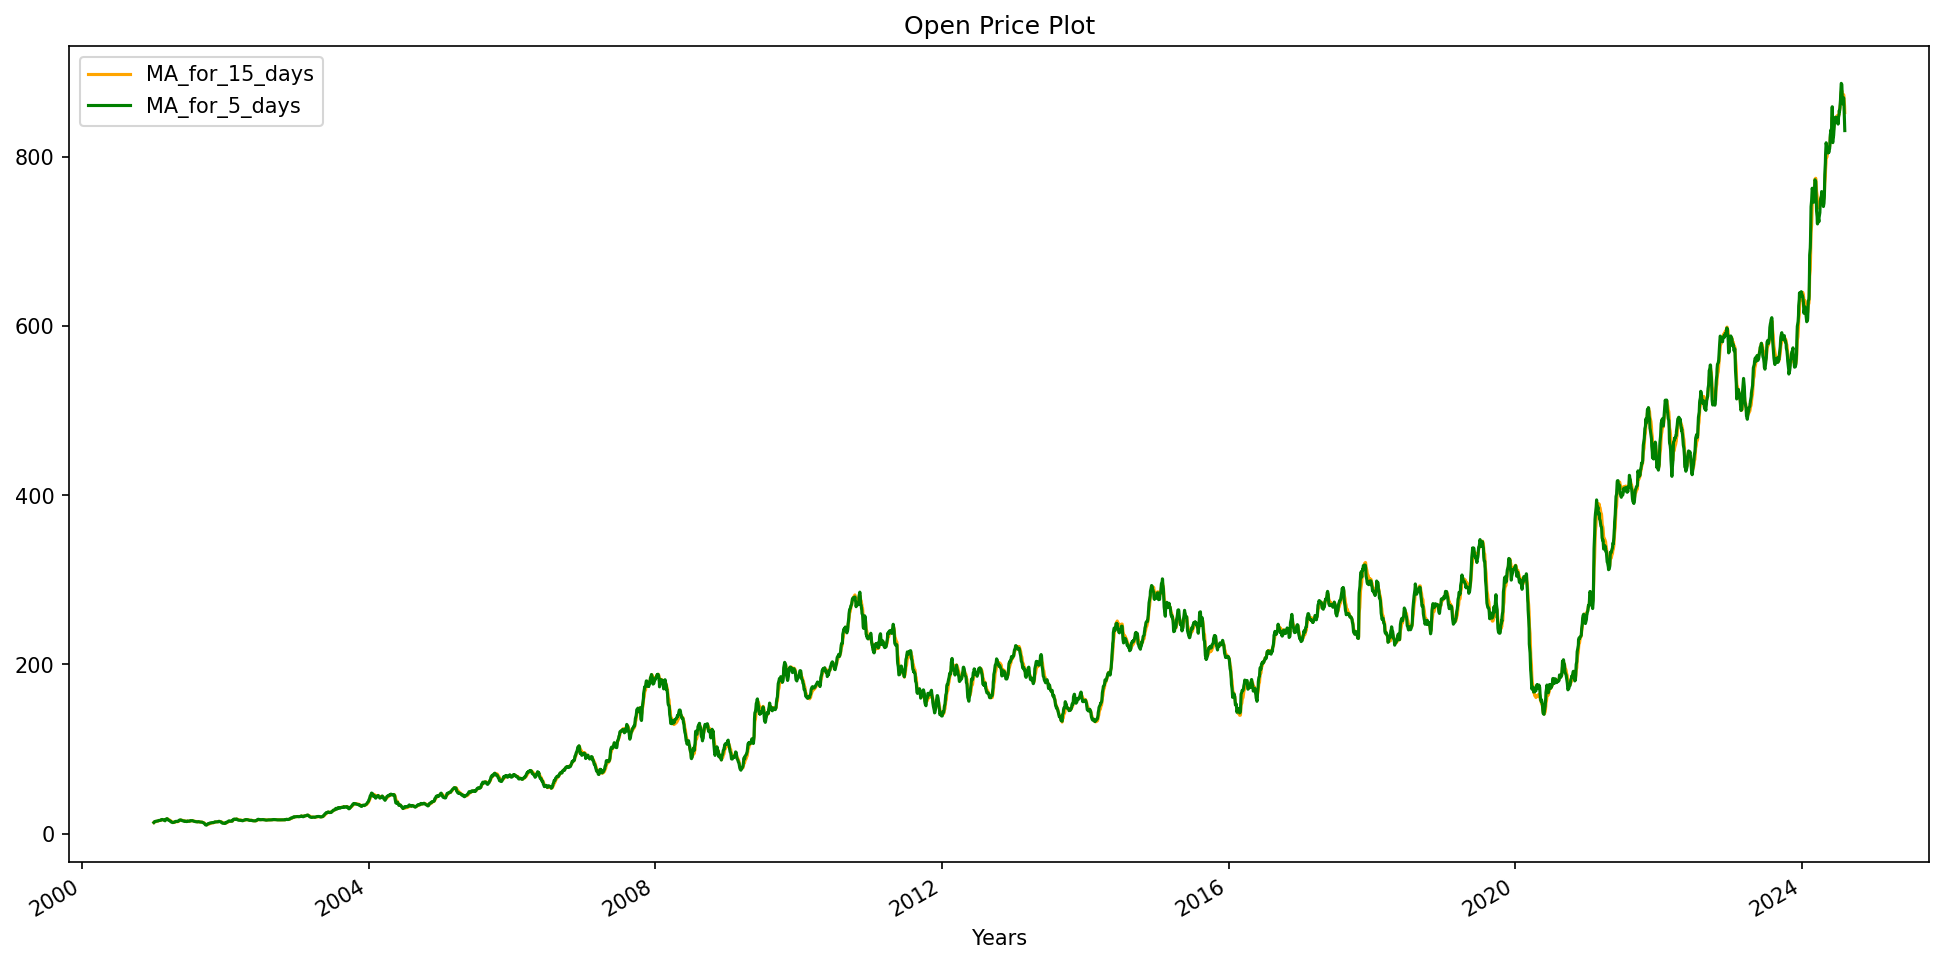

In [61]:
 
# to set the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
  
# using plot method to plot open prices. 
# in plot method we set the label and color of the curve. 
newdf['MA_for_15_days'].plot(label='MA_for_15_days', color='orange') 
newdf['MA_for_5_days'].plot(label='MA_for_5_days', color='green') 


# adding title to the plot 
plt.title('Open Price Plot') 
  
# adding Label to the x-axis 
plt.xlabel('Years') 
  
# adding legend to the curve 
plt.legend() 

In [62]:
newdf

,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days,RSI
Date,,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417,NaN
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187,100.000000
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070,100.000000
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674,82.745854
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426,84.102582
...,...,...,...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024,870.245383,873.865883,60.121130
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024,867.889537,872.881331,52.528695
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024,860.844197,869.414492,45.422925


In [63]:
newdf['Buy'] = newdf.apply(lambda row: 1 if row['MA_for_5_days'] > row['MA_for_15_days'] else 0, axis=1)

In [64]:
newdf


,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days,RSI,Buy
Date,,,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417,NaN,0
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187,100.000000,1
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070,100.000000,1
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674,82.745854,1
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426,84.102582,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024,870.245383,873.865883,60.121130,0
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024,867.889537,872.881331,52.528695,0
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024,860.844197,869.414492,45.422925,0


In [65]:
newdf['Signal'] = 0
newdf['Buy_Price'] = np.nan
newdf['Sell_Price'] = np.nan
newdf['Stop_Loss'] = np.nan

In [66]:
newdf

,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days,RSI,Buy,Signal,Buy_Price,Sell_Price,Stop_Loss
Date,,,,,,,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417,NaN,0,0,NaN,NaN,NaN
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187,100.000000,1,0,NaN,NaN,NaN
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070,100.000000,1,0,NaN,NaN,NaN
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674,82.745854,1,0,NaN,NaN,NaN
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426,84.102582,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024,870.245383,873.865883,60.121130,0,0,NaN,NaN,NaN
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024,867.889537,872.881331,52.528695,0,0,NaN,NaN,NaN
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024,860.844197,869.414492,45.422925,0,0,NaN,NaN,NaN


In [67]:
len(newdf)

5877

In [68]:
# Strategy: Buy when 5_MA crosses above 15_MA, sell at 10% profit or 5% stop loss
position = False  # Keeps track of whether we hold a position
buy_price = 0
stop_loss_price = 0
target_achieved = 0
stoploss_hit = 0
total_trades = 0

In [69]:
# for buying
for i in range(1, len(newdf)):
    # Check if RSI is greater than 70
    if newdf['RSI'].iloc[i] > 70:
        # Buy condition: 5 MA crosses above 15 MA
        if newdf['MA_for_5_days'].iloc[i] > newdf['MA_for_15_days'].iloc[i] and newdf['MA_for_5_days'].iloc[i-1] <= newdf['MA_for_15_days'].iloc[i-1]:
            if not position:  # Buy only if not already in position
                newdf.at[newdf.index[i], 'Signal'] = 1  # Buy signal
                newdf.at[newdf.index[i], 'Buy_Price'] = newdf['Close'].iloc[i]
                buy_price = newdf['Close'].iloc[i]
                stop_loss_price = buy_price * 0.9  # Set stop loss at 10% below buy price
                newdf.at[newdf.index[i], 'Stop_Loss'] = stop_loss_price
                position = True
    
    # Sell conditions: 20% profit target or 10% stop loss
    if position:
        if newdf['Close'].iloc[i] >= buy_price * 1.2:  # 20% profit target
            newdf.at[newdf.index[i], 'Signal'] = -1  # Sell signal
            newdf.at[newdf.index[i], 'Sell_Price'] = newdf['Close'].iloc[i]
            target_achieved += 1
            position = False  # Reset position after selling
            total_trades += 1
        elif newdf['Close'].iloc[i] <= stop_loss_price:  # 10% stop loss
            newdf.at[newdf.index[i], 'Signal'] = -1  # Sell signal
            newdf.at[newdf.index[i], 'Sell_Price'] = newdf['Close'].iloc[i]
            stoploss_hit += 1
            position = False  # Reset position after selling
            total_trades += 1


In [70]:
# Selling strategy
'''for i in range(1, len(newdf)):
    # Short Sell condition: 9 EMA crosses below 15 EMA
    if newdf['MA_for_5_days'].iloc[i] < newdf['MA_for_15_days'].iloc[i] and newdf['MA_for_5_days'].iloc[i-1] >= newdf['MA_for_15_days'].iloc[i-1]:
        if not position:  # Short sell only if not already in position
            newdf.at[newdf.index[i], 'Signal'] = -1  # Short sell signal
            newdf.at[newdf.index[i], 'Sell_Price'] = newdf['Close'].iloc[i]
            sell_price = newdf['Close'].iloc[i]
            stop_loss_price = sell_price * 1.05  # Set stop loss at 10% above sell price
            newdf.at[newdf.index[i], 'Stop_Loss'] = stop_loss_price
            position = True
    
    # Buy back conditions: 20% profit target or 10% stop loss
    if position:
        if newdf['Close'].iloc[i] <= sell_price * 0.99:  # 20% profit target (price falls 20%)
            newdf.at[newdf.index[i], 'Signal'] = 1  # Buy back signal
            newdf.at[newdf.index[i], 'Buy_Price'] = newdf['Close'].iloc[i]
            target_achieved += 1
            position = False  # Reset position after buying back
            total_trades += 1
        elif newdf['Close'].iloc[i] >= stop_loss_price:  # 10% stop loss (price rises 10%)
            newdf.at[newdf.index[i], 'Signal'] = 1  # Buy back signal
            newdf.at[newdf.index[i], 'Buy_Price'] = newdf['Close'].iloc[i]
            stoploss_hit += 1
            position = False  # Reset position after buying back
            total_trades += 1
'''

"for i in range(1, len(newdf)):\n    # Short Sell condition: 9 EMA crosses below 15 EMA\n    if newdf['MA_for_5_days'].iloc[i] < newdf['MA_for_15_days'].iloc[i] and newdf['MA_for_5_days'].iloc[i-1] >= newdf['MA_for_15_days'].iloc[i-1]:\n        if not position:  # Short sell only if not already in position\n            newdf.at[newdf.index[i], 'Signal'] = -1  # Short sell signal\n            newdf.at[newdf.index[i], 'Sell_Price'] = newdf['Close'].iloc[i]\n            sell_price = newdf['Close'].iloc[i]\n            stop_loss_price = sell_price * 1.05  # Set stop loss at 10% above sell price\n            newdf.at[newdf.index[i], 'Stop_Loss'] = stop_loss_price\n            position = True\n    \n    # Buy back conditions: 20% profit target or 10% stop loss\n    if position:\n        if newdf['Close'].iloc[i] <= sell_price * 0.99:  # 20% profit target (price falls 20%)\n            newdf.at[newdf.index[i], 'Signal'] = 1  # Buy back signal\n            newdf.at[newdf.index[i], 'Buy_Price']

Total Trades: 10
Target Achieved: 6 times (60.00%)
Stop Loss Hit: 4 times (40.00%)


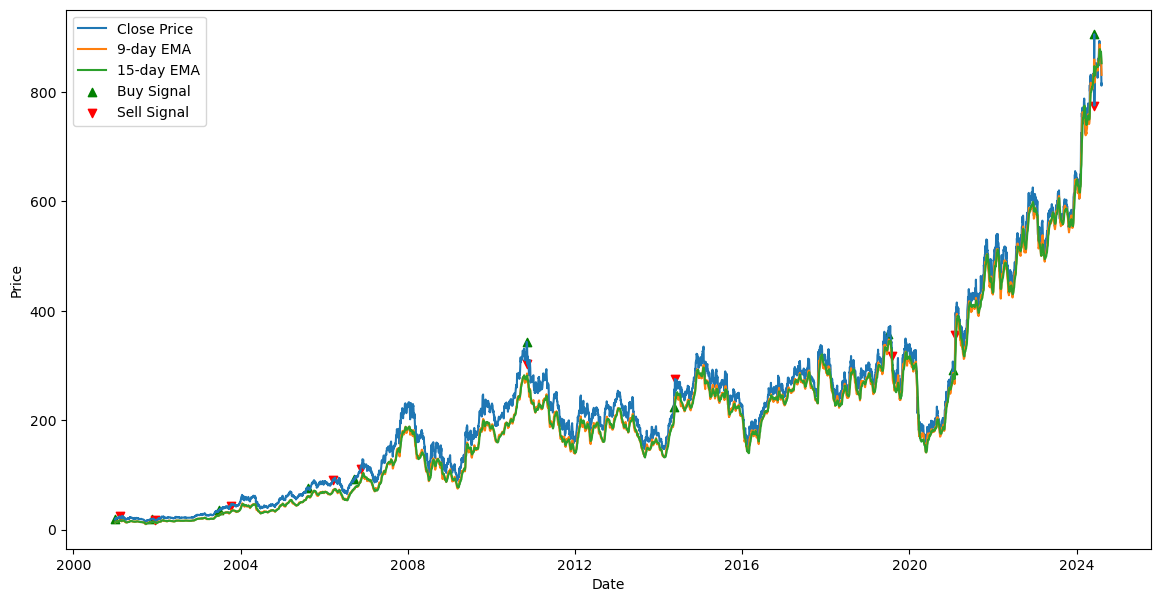

In [71]:

# Calculate the percentage of target achieved and stoploss hit
target_achieved_pct = (target_achieved / total_trades) * 100 if total_trades > 0 else 0
stoploss_hit_pct = (stoploss_hit / total_trades) * 100 if total_trades > 0 else 0

# Display the results
print(f"Total Trades: {total_trades}")
print(f"Target Achieved: {target_achieved} times ({target_achieved_pct:.2f}%)")
print(f"Stop Loss Hit: {stoploss_hit} times ({stoploss_hit_pct:.2f}%)")

# Optionally, plot the strategy
plt.figure(figsize=(14, 7))
plt.plot(newdf['Close'], label='Close Price')
plt.plot(newdf['MA_for_5_days'], label='9-day EMA')
plt.plot(newdf['MA_for_15_days'], label='15-day EMA')
plt.scatter(newdf[newdf['Signal'] == 1].index, newdf[newdf['Signal'] == 1]['Buy_Price'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(newdf[newdf['Signal'] == -1].index, newdf[newdf['Signal'] == -1]['Sell_Price'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [72]:
newdf

,Open,High,Low,Close,Adj Close,Volume,Year,MA_for_5_days,MA_for_15_days,RSI,Buy,Signal,Buy_Price,Sell_Price,Stop_Loss
Date,,,,,,,,,,,,,,,
2001-01-01,18.261845,18.662842,18.030684,18.398657,12.980417,11237186.0,2001,12.980417,12.980417,NaN,0,0,NaN,NaN,NaN
2001-01-02,18.643970,19.719585,18.412809,19.417658,13.699329,21367159.0,2001,13.239225,13.105187,100.000000,1,1,19.417658,NaN,17.475892
2001-01-03,19.436529,20.799915,19.351612,20.502707,14.464842,59167521.0,2001,13.698851,13.346070,100.000000,1,0,NaN,NaN,NaN
2001-01-04,20.606495,20.851810,19.743174,20.063971,14.155313,29457229.0,2001,13.912221,13.500674,82.745854,1,0,NaN,NaN,NaN
2001-01-05,20.068687,20.606495,19.875265,20.280979,14.308412,29628333.0,2001,14.113617,13.660426,84.102582,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,873.849976,874.950012,868.000000,872.400024,872.400024,11636874.0,2024,870.245383,873.865883,60.121130,0,0,NaN,NaN,NaN
2024-08-01,877.799988,881.400024,859.450012,862.650024,862.650024,11787203.0,2024,867.889537,872.881331,52.528695,0,0,NaN,NaN,NaN
2024-08-02,856.700012,858.299988,846.150024,847.849976,847.849976,12609331.0,2024,860.844197,869.414492,45.422925,0,0,NaN,NaN,NaN


In [73]:
newdf.Signal.value_counts()

Signal
 0    5857
 1      10
-1      10
Name: count, dtype: int64

In [74]:
#newdf.to_csv('output.csv', index=False)